In [1]:
import pandas as pd
import numpy as np
import kineticstoolkit.lab as ktk
import matplotlib.pyplot as plt

In [25]:
#Importation du fichier
df = pd.read_csv(r'C:\Users\Nathan\Desktop\Formation\Handicap_Neurologique\M1\Stage\Etude_M1HN\data\nappe de pression\1\Leila_Bit_A_FRA.csv',
                 sep = ";",index_col="time ")
df = df.drop(df.iloc[:, 0:5],axis=1) #si on veut que CoP Ant
df.columns = ["cop_ml","cop_ant"]

if df["cop_ant"][:50].mean() <0:
    initial_ant = np.sqrt(df["cop_ant"][:50].mean() ** 2)
else :
    initial_ant = -df["cop_ant"][:50].mean()
    
if df["cop_ml"][:50].mean() <0:
    initial_ml = np.sqrt(df["cop_ml"][:50].mean() ** 2)
else :
    initial_ml = -df["cop_ml"][:50].mean()

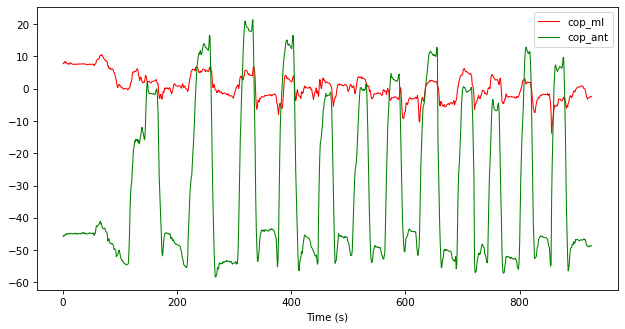

In [26]:
#Transformation du df en TimeSeries
ts = ktk.TimeSeries.from_dataframe(df)
ts
ts.plot()

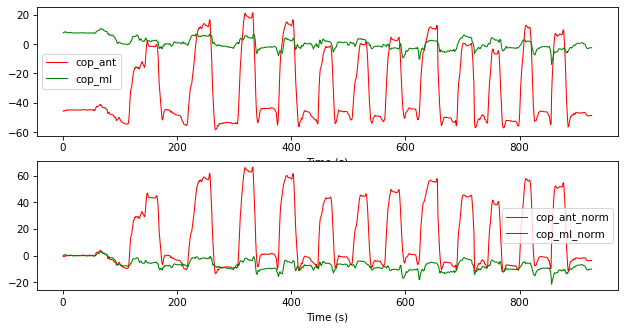

In [29]:
#Normalisation des data du CoP Ant 
ts.data["cop_ant_norm"] = ts.data["cop_ant"] + initial_ant
ts.data["cop_ml_norm"] = ts.data["cop_ml"] + initial_ml

plt.subplot(2,1,1)
ts.plot(["cop_ant","cop_ml"])
plt.subplot(2,1,2)
ts.plot(["cop_ant_norm","cop_ml_norm"])

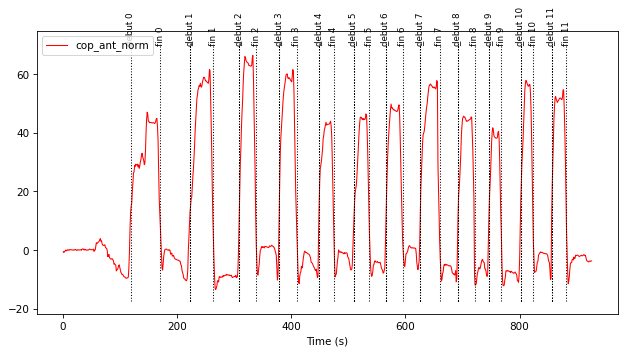

In [30]:
# Détection des cycles 
# ici on définis 10 la valeur de seuil pour la détection d'un cycle
ts_with_events = ktk.cycles.detect_cycles(
    ts, "cop_ant_norm", event_names=["debut", "fin"],thresholds=[10,10]
)
ts_with_events.plot("cop_ant_norm")

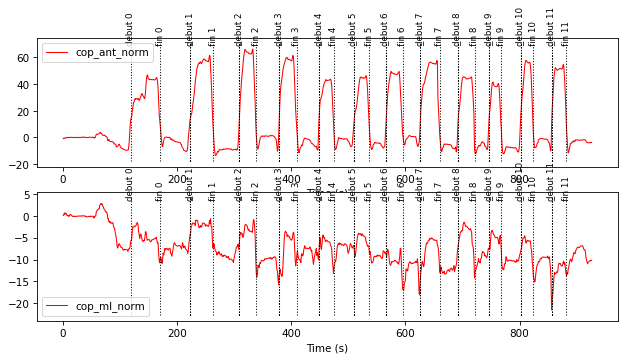

In [33]:
# Visualisation des cycles repérés sur cop_ant et sur cop_ml

plt.subplot(2,1,1)
ts_with_events.plot("cop_ant_norm")
plt.subplot(2,1,2)
ts_with_events.plot("cop_ml_norm")

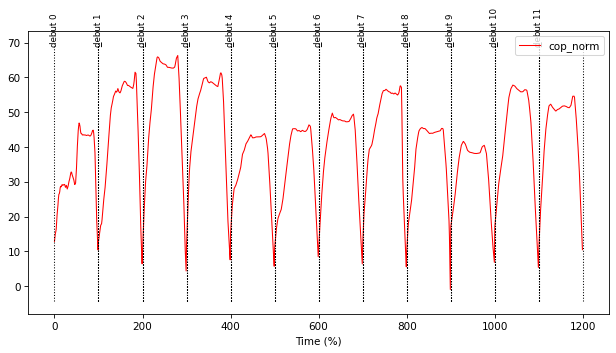

In [13]:
# Prendre que les cycles 
# span sert à inclure des données en plus du 0-100 % du cycle (par défaut span[0,100])
ts_normalized_on_cycle = ktk.cycles.time_normalize(
    ts_with_events, event_name1="debut", event_name2="fin"
    , span=[0,100]  
)
ts_normalized_on_cycle.plot("cop_ant_norm")

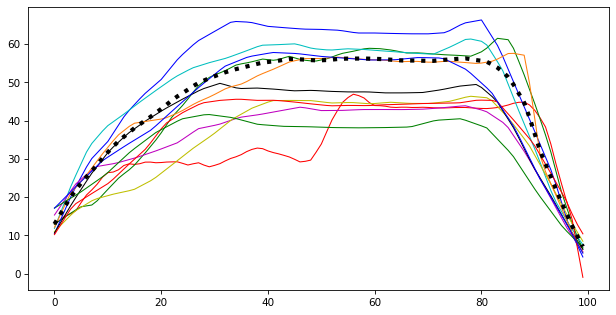

In [14]:
# Superposer l'ensemble des cycles dans l'axe ant_post
data = ktk.cycles.stack(ts_normalized_on_cycle)
for i_cycle in range(11):
    plt.plot(data["cop_ant_norm"][i_cycle], label=f"Cycle {i_cycle}")

# Ajouter un cylce moyen calculé sur les 6 cycles les plus répétables
index = ktk.cycles.most_repeatable_cycles(data["cop_ant_norm"])
plt.plot(
    np.mean(data["cop_ant_norm"][index[0:5]], axis=0),
    "k:",
    linewidth=4,
    label="Average",
)

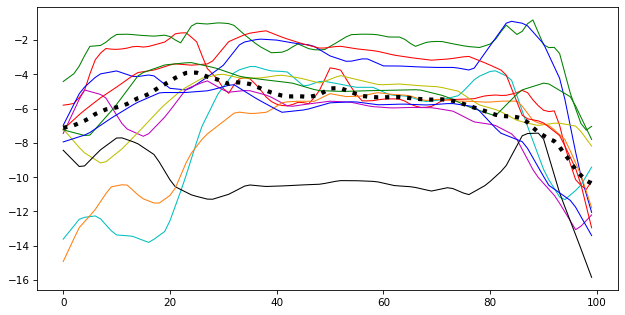

In [34]:
# Superposer l'ensemble des cycles dans l'axe médio-latéral
data = ktk.cycles.stack(ts_normalized_on_cycle)
for i_cycle in range(11):
    plt.plot(data["cop_ml_norm"][i_cycle], label=f"Cycle {i_cycle}")

# Ajouter un cylce moyen calculé sur les 6 cycles les plus répétables
index = ktk.cycles.most_repeatable_cycles(data["cop_ml_norm"])
plt.plot(
    np.mean(data["cop_ml_norm"][index[0:5]], axis=0),
    "k:",
    linewidth=4,
    label="Average",
)